In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./dataset'):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./dataset\smoking_driking_dataset_Ver01.csv


# Data exploration

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_main = pd.read_csv(data_path)
df_main.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [5]:
df_main.shape

(991346, 24)

In [6]:
df_main.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

# Pre-processing

In [7]:
df_main = df_main.drop_duplicates()

In [8]:
df_main['DRK_YN'] = df_main['DRK_YN'].replace(['Y', 'N'], [1, 0])

In [9]:
df_main = pd.get_dummies(df_main, columns=['sex'])

In [10]:
df_main.dtypes

age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN                int64
sex_Female             bool
sex_Male               bool
dtype: object

In [11]:
df_main.isnull().sum()

age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
sex_Female          0
sex_Male            0
dtype: int64

In [12]:
df_main.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,...,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,1.031495,1.030476,122.432360,76.052549,...,113.037429,132.140030,14.229810,1.094221,0.860467,25.989424,25.755148,37.136152,1.608112,0.499814
std,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,0.174652,0.171892,14.543083,9.889334,...,35.842938,102.194762,1.584924,0.437719,0.480536,23.493668,26.308910,50.423811,0.818504,0.500000
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,0.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,1.000000


In [13]:
pd.crosstab(df_main['age'], df_main['DRK_YN'])

DRK_YN,0,1
age,,
20,7935,14035
25,21083,43286
30,26217,51381
35,28505,56217
40,52197,78184
45,52109,66244
50,65321,64109
55,63238,47983
60,67721,38341


In [14]:
pd.crosstab(df_main['weight'], df_main['DRK_YN'])

DRK_YN,0,1
weight,,
25,9,0
30,152,5
35,1695,253
40,12322,4317
45,43049,19997
50,81964,43112
55,93600,56812
60,82978,68154
65,64772,76465


In [15]:
df_main.corr().round(1)

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Female,sex_Male
age,1.0,-0.4,-0.2,0.1,-0.2,-0.2,0.2,0.2,0.3,0.1,...,-0.2,0.0,0.0,0.1,-0.0,0.0,-0.1,-0.3,0.1,-0.1
height,-0.4,1.0,0.7,0.3,0.1,0.1,-0.1,-0.1,0.0,0.1,...,0.5,0.0,0.2,0.0,0.1,0.2,0.5,0.4,-0.7,0.7
weight,-0.2,0.7,1.0,0.6,0.1,0.1,-0.0,-0.0,0.3,0.3,...,0.5,0.0,0.2,0.1,0.3,0.2,0.4,0.3,-0.6,0.6
waistline,0.1,0.3,0.6,1.0,0.0,0.0,0.0,0.0,0.3,0.2,...,0.3,0.0,0.1,0.1,0.2,0.2,0.2,0.1,-0.3,0.3
sight_left,-0.2,0.1,0.1,0.0,1.0,0.3,-0.0,-0.0,-0.0,-0.0,...,0.1,-0.0,0.0,-0.0,0.0,0.0,0.1,0.1,-0.1,0.1
sight_right,-0.2,0.1,0.1,0.0,0.3,1.0,-0.0,-0.0,-0.0,-0.0,...,0.1,-0.0,0.0,-0.0,0.0,0.0,0.1,0.1,-0.1,0.1
hear_left,0.2,-0.1,-0.0,0.0,-0.0,-0.0,1.0,0.5,0.1,0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.1,-0.0,0.0
hear_right,0.2,-0.1,-0.0,0.0,-0.0,-0.0,0.5,1.0,0.1,0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.1,0.0,-0.0
SBP,0.3,0.0,0.3,0.3,-0.0,-0.0,0.1,0.1,1.0,0.7,...,0.2,0.1,0.1,0.1,0.1,0.2,0.1,0.0,-0.2,0.2
DBP,0.1,0.1,0.3,0.2,-0.0,-0.0,0.0,0.0,0.7,1.0,...,0.2,0.0,0.1,0.1,0.1,0.2,0.1,0.1,-0.2,0.2


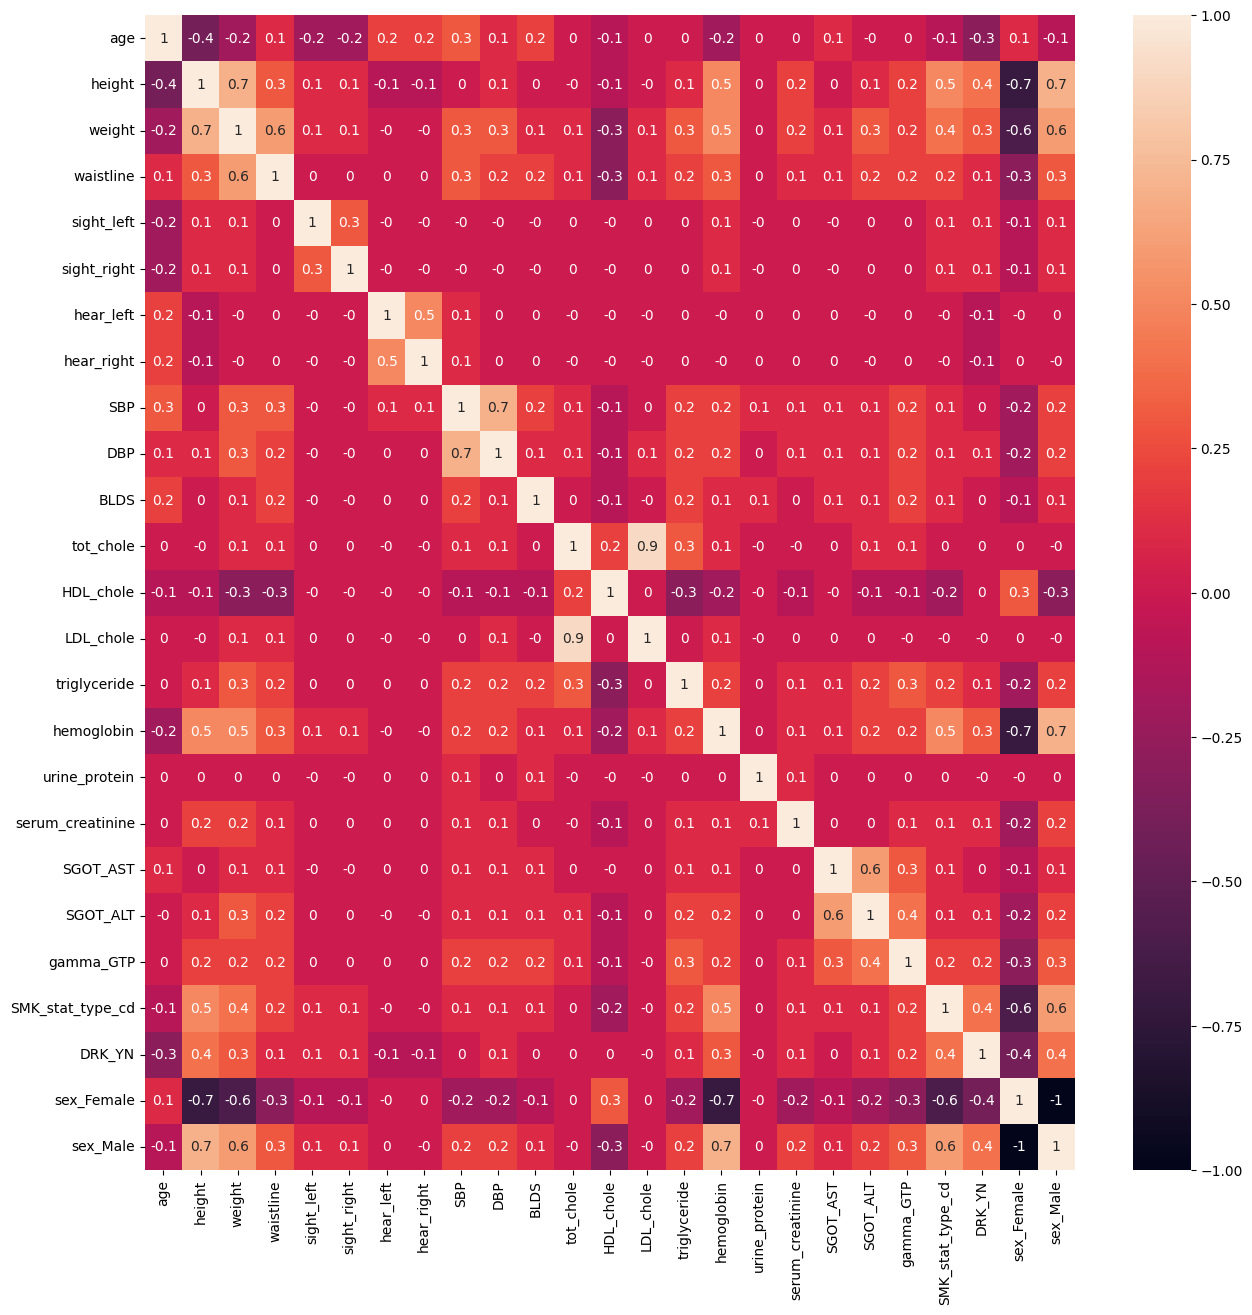

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_main.corr().round(1), annot=True)
plt.show()

In [17]:
df_main = df_main.sample(frac=1).reset_index(drop=True)
df_main.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,sex_Female,sex_Male
0,30,175,60,77.0,1.2,0.9,1.0,1.0,108.0,68.0,...,14.7,1.0,0.8,14.0,15.0,18.0,1.0,0,False,True
1,55,175,65,83.0,1.2,1.2,1.0,1.0,130.0,80.0,...,16.8,1.0,1.0,23.0,11.0,26.0,3.0,1,False,True
2,30,175,75,78.8,0.6,0.4,1.0,1.0,125.0,72.0,...,16.8,1.0,1.0,26.0,30.0,23.0,1.0,1,False,True
3,60,150,50,88.5,0.9,0.8,1.0,1.0,96.0,63.0,...,14.8,1.0,0.6,19.0,18.0,17.0,1.0,0,True,False
4,45,160,70,89.1,1.0,1.2,1.0,1.0,108.0,68.0,...,15.0,2.0,0.7,30.0,19.0,18.0,1.0,0,True,False


# Building Model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_main.drop(columns=['DRK_YN'])
Y = df_main['DRK_YN']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
x_train.shape, y_train.shape

((793056, 24), (793056,))

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic_regression_model = LogisticRegression(
    penalty='l2', # This is the default value.
    C=1.0, # Strength of regularization.
    solver='liblinear' # The kind of optimization.
).fit(x_train, y_train)

In [24]:
y_pred = logistic_regression_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

# Results

In [25]:
df_results = pd.DataFrame({
    'y_test': y_test, 
    'y_pred': y_pred
})
df_results.head()

,y_test,y_pred
461976,1,1
320864,0,0
795928,0,0
175205,1,1
550623,0,0


In [26]:
pd.crosstab(df_results.y_pred, df_results.y_test)

y_test,0,1
y_pred,,
0,73255,27834
1,25981,71194


# Metrics

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [28]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [29]:
print(f'acc = {acc}', f'prec = {prec}', f'recall = {recall}', sep='\n')

acc = 0.7285689787354235
prec = 0.7326369951119115
recall = 0.7189279799652624


In [30]:
confusion_matrix(y_test, y_pred)

array([[73255, 25981],
       [27834, 71194]], dtype=int64)

# Multi-model method

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [32]:
FEATURES = list(df_main.columns.drop('DRK_YN'))
FEATURES

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'hear_left',
 'hear_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'SMK_stat_type_cd',
 'sex_Female',
 'sex_Male']

In [33]:
result_dict = {}

In [34]:
def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)
    
    pred = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return {
        'accuracy': acc, 
        'precision': prec, 
        'recall': recall, 
        'accuracy_count': num_acc
    }

In [35]:
def build_model(
    classifier_fn, 
    name_of_y_col, 
    names_of_x_cols, 
    dataset, 
    test_frac=0.2):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = classifier_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({
        'y_test': y_test, 
        'y_pred': y_pred
    })
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {
        'training': train_summary, 
        'test': test_summary, 
        'confusion_matrix': model_crosstab
    }

In [36]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)
        
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
        
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
        
        print()

In [37]:
def logistic_fn(x_train, y_train):
    
    model = LogisticRegression(solver='liblinear')
    model.fit(x_train, y_train)
    
    return model

In [38]:
result_dict['DRK_YN - logistic'] = build_model(logistic_fn, 
                                               'DRK_YN', 
                                               FEATURES, 
                                               df_main)
compare_results()

Classification:  DRK_YN - logistic

Training data
accuracy 0.7254645321389662
precision 0.7326369951119115
recall 0.7165715525002458
accuracy_count 575334

Test data
accuracy 0.7268893999919299
precision 0.7326369951119115
recall 0.716126749886289
accuracy_count 144116



In [39]:
def linear_discriminant_fn(x_train, y_train, solver='svd'):
    
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train, y_train)
    
    return model

In [40]:
result_dict['DRK_YN - linear_discriminant_analysis'] = build_model(linear_discriminant_fn, 
                                                                   'DRK_YN', 
                                                                   FEATURES, 
                                                                   df_main)
compare_results()

Classification:  DRK_YN - logistic

Training data
accuracy 0.7254645321389662
precision 0.7326369951119115
recall 0.7165715525002458
accuracy_count 575334

Test data
accuracy 0.7268893999919299
precision 0.7326369951119115
recall 0.716126749886289
accuracy_count 144116

Classification:  DRK_YN - linear_discriminant_analysis

Training data
accuracy 0.721554341685833
precision 0.7326369951119115
recall 0.7135341398886762
accuracy_count 572233

Test data
accuracy 0.7210890529798653
precision 0.7326369951119115
recall 0.7146653195251326
accuracy_count 142966



In [41]:
def quadratic_descriminant_fn(x_train, y_train):
    
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train, y_train)
    
    return model

In [42]:
result_dict['DRK_YN - quadratic_descriminant_analysis'] = build_model(quadratic_descriminant_fn, 
                                                                   'DRK_YN', 
                                                                   FEATURES, 
                                                                   df_main)
compare_results()

c:\GitHub\Smoking-and-Drinking-Dataset-with-body-signal\.venv\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classification:  DRK_YN - logistic

Training data
accuracy 0.7254645321389662
precision 0.7326369951119115
recall 0.7165715525002458
accuracy_count 575334

Test data
accuracy 0.7268893999919299
precision 0.7326369951119115
recall 0.716126749886289
accuracy_count 144116

Classification:  DRK_YN - linear_discriminant_analysis

Training data
accuracy 0.721554341685833
precision 0.7326369951119115
recall 0.7135341398886762
accuracy_count 572233

Test data
accuracy 0.7210890529798653
precision 0.7326369951119115
recall 0.7146653195251326
accuracy_count 142966

Classification:  DRK_YN - quadratic_descriminant_analysis

Training data
accuracy 0.5378775269337852
precision 0.7326369951119115
recall 0.8099621880514243
accuracy_count 426567

Test data
accuracy 0.5379494007989347
precision 0.7326369951119115
recall 0.8118267595367296
accuracy_count 106656



In [43]:
def sgd_fn(x_train, y_train, max_iter=10000, tol=1e-3):
    
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

In [44]:
result_dict['DRK_YN - sgd'] = build_model(sgd_fn, 
                                          'DRK_YN', 
                                          FEATURES, 
                                          df_main)
compare_results()

Classification:  DRK_YN - logistic

Training data
accuracy 0.7254645321389662
precision 0.7326369951119115
recall 0.7165715525002458
accuracy_count 575334

Test data
accuracy 0.7268893999919299
precision 0.7326369951119115
recall 0.716126749886289
accuracy_count 144116

Classification:  DRK_YN - linear_discriminant_analysis

Training data
accuracy 0.721554341685833
precision 0.7326369951119115
recall 0.7135341398886762
accuracy_count 572233

Test data
accuracy 0.7210890529798653
precision 0.7326369951119115
recall 0.7146653195251326
accuracy_count 142966

Classification:  DRK_YN - quadratic_descriminant_analysis

Training data
accuracy 0.5378775269337852
precision 0.7326369951119115
recall 0.8099621880514243
accuracy_count 426567

Test data
accuracy 0.5379494007989347
precision 0.7326369951119115
recall 0.8118267595367296
accuracy_count 106656

Classification:  DRK_YN - sgd

Training data
accuracy 0.6844384255336319
precision 0.7326369951119115
recall 0.7422104525824057
accuracy_count 

In [45]:
def linear_svc_fn(x_train, y_train, C=1.0, max_iter=10000, tol=1e-3):
    
    model = LinearSVC(C=C, max_iter=max_iter, tol=tol, dual=False)
    model.fit(x_train, y_train)
    
    return model

In [46]:
result_dict['DRK_YN - linear_svc'] = build_model(linear_svc_fn, 
                                                 'DRK_YN', 
                                                 FEATURES, 
                                                 df_main)
compare_results()

Classification:  DRK_YN - logistic

Training data
accuracy 0.7254645321389662
precision 0.7326369951119115
recall 0.7165715525002458
accuracy_count 575334

Test data
accuracy 0.7268893999919299
precision 0.7326369951119115
recall 0.716126749886289
accuracy_count 144116

Classification:  DRK_YN - linear_discriminant_analysis

Training data
accuracy 0.721554341685833
precision 0.7326369951119115
recall 0.7135341398886762
accuracy_count 572233

Test data
accuracy 0.7210890529798653
precision 0.7326369951119115
recall 0.7146653195251326
accuracy_count 142966

Classification:  DRK_YN - quadratic_descriminant_analysis

Training data
accuracy 0.5378775269337852
precision 0.7326369951119115
recall 0.8099621880514243
accuracy_count 426567

Test data
accuracy 0.5379494007989347
precision 0.7326369951119115
recall 0.8118267595367296
accuracy_count 106656

Classification:  DRK_YN - sgd

Training data
accuracy 0.6844384255336319
precision 0.7326369951119115
recall 0.7422104525824057
accuracy_count 

In [47]:
def radius_neighbor_fn(x_train, y_train, radius=10.0):
    
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train, y_train)
    
    return model

In [48]:
# result_dict['DRK_YN - radius_neighbor'] = build_model(radius_neighbor_fn, 
#                                                       'DRK_YN', 
#                                                       FEATURES, 
#                                                       df_main)
# compare_results()

In [49]:
def decision_tree_fn(x_train, y_train, max_depth=None, max_features=None):
    
    model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
    model.fit(x_train, y_train)
    
    return model

In [50]:
result_dict['DRK_YN - decision_tree'] = build_model(decision_tree_fn, 
                                                    'DRK_YN', 
                                                    FEATURES, 
                                                    df_main)
compare_results()

Classification:  DRK_YN - logistic

Training data
accuracy 0.7254645321389662
precision 0.7326369951119115
recall 0.7165715525002458
accuracy_count 575334

Test data
accuracy 0.7268893999919299
precision 0.7326369951119115
recall 0.716126749886289
accuracy_count 144116

Classification:  DRK_YN - linear_discriminant_analysis

Training data
accuracy 0.721554341685833
precision 0.7326369951119115
recall 0.7135341398886762
accuracy_count 572233

Test data
accuracy 0.7210890529798653
precision 0.7326369951119115
recall 0.7146653195251326
accuracy_count 142966

Classification:  DRK_YN - quadratic_descriminant_analysis

Training data
accuracy 0.5378775269337852
precision 0.7326369951119115
recall 0.8099621880514243
accuracy_count 426567

Test data
accuracy 0.5379494007989347
precision 0.7326369951119115
recall 0.8118267595367296
accuracy_count 106656

Classification:  DRK_YN - sgd

Training data
accuracy 0.6844384255336319
precision 0.7326369951119115
recall 0.7422104525824057
accuracy_count 

In [51]:
def naive_bayes_fn(x_train, y_train, priors=None):
    
    model = GaussianNB(priors=priors)
    model.fit(x_train, y_train)
    
    return model

In [52]:
result_dict['DRK_YN - naive_bayes'] = build_model(naive_bayes_fn, 
                                                  'DRK_YN', 
                                                  FEATURES, 
                                                  df_main)
compare_results()

Classification:  DRK_YN - logistic

Training data
accuracy 0.7254645321389662
precision 0.7326369951119115
recall 0.7165715525002458
accuracy_count 575334

Test data
accuracy 0.7268893999919299
precision 0.7326369951119115
recall 0.716126749886289
accuracy_count 144116

Classification:  DRK_YN - linear_discriminant_analysis

Training data
accuracy 0.721554341685833
precision 0.7326369951119115
recall 0.7135341398886762
accuracy_count 572233

Test data
accuracy 0.7210890529798653
precision 0.7326369951119115
recall 0.7146653195251326
accuracy_count 142966

Classification:  DRK_YN - quadratic_descriminant_analysis

Training data
accuracy 0.5378775269337852
precision 0.7326369951119115
recall 0.8099621880514243
accuracy_count 426567

Test data
accuracy 0.5379494007989347
precision 0.7326369951119115
recall 0.8118267595367296
accuracy_count 106656

Classification:  DRK_YN - sgd

Training data
accuracy 0.6844384255336319
precision 0.7326369951119115
recall 0.7422104525824057
accuracy_count 